In [2]:
import torch 
import math 
import matplotlib.pyplot as plt
from tqdm import tqdm
from regressor import *

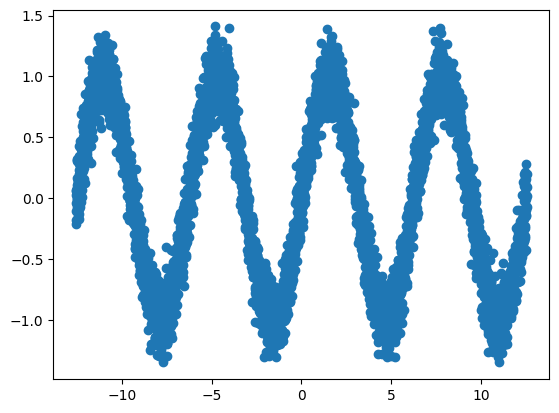

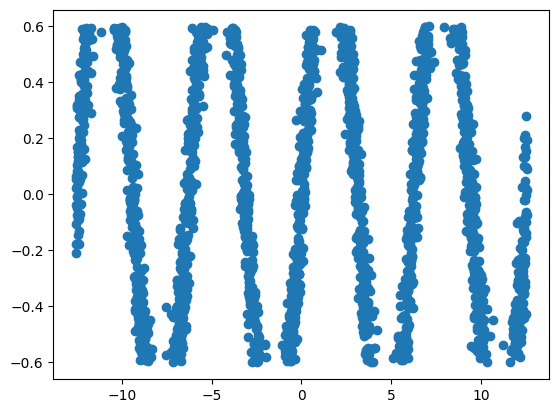

In [3]:
num_samples = 5000
D_theta = torch.linspace(-4*math.pi, 4*math.pi,num_samples).unsqueeze(-1)
D_x = torch.sin(D_theta) + torch.randn([num_samples,1])*0.15
plt.scatter(D_theta, D_x)
plt.show()
D_theta_out = D_theta[torch.abs(D_x)>0.60].unsqueeze(-1)
D_theta = D_theta[torch.abs(D_x)<0.60].unsqueeze(-1)

D_x = D_x[torch.abs(D_x)<0.60].unsqueeze(-1)

plt.scatter(D_theta, D_x)
plt.show()

In [26]:
epochs = 500
mc_samples = 5
list_nn = []
for _ in range(mc_samples):
    model = regressor(D_theta, D_x,[128,128,128])
    model.train(200,None, lr = 5e-4, verbose = True)
    list_nn.append(model)
test = torch.linspace(-4*math.pi, 4*math.pi,500).unsqueeze(-1)
predictions = [model.f(test) for model in list_nn]
pred = torch.cat(predictions, dim = -1)
mean, cov = torch.mean(pred, dim=-1), torch.sqrt(torch.var(pred, dim =-1))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:02<00:00, 90.74it/s, loss = 3.2953; device = cpu]


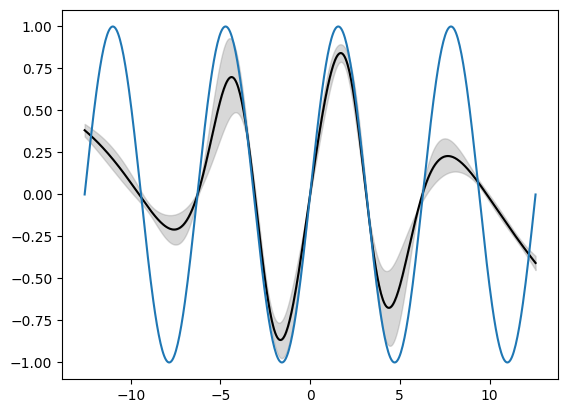

In [27]:
plt.plot(test.squeeze(-1).numpy(),mean.detach().numpy(), color = 'black')
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() + 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() - 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.plot(test, torch.sin(test))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 88.42it/s, loss = 1.9448; device = cpu]


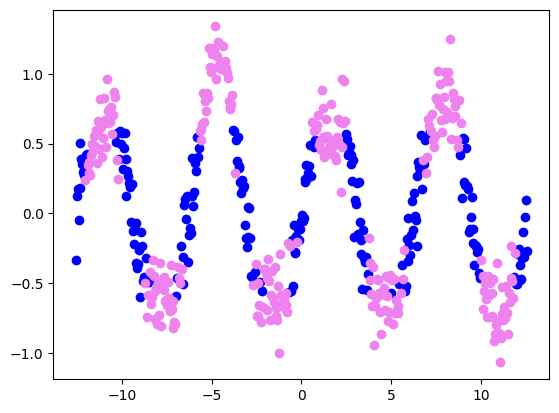

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 88.63it/s, loss = 1.9561; device = cpu]


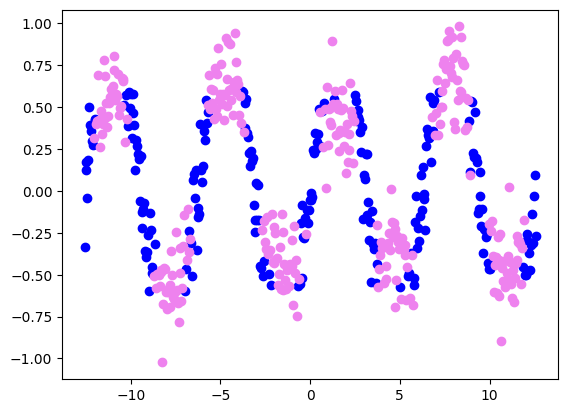

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.73it/s, loss = 1.9778; device = cpu]


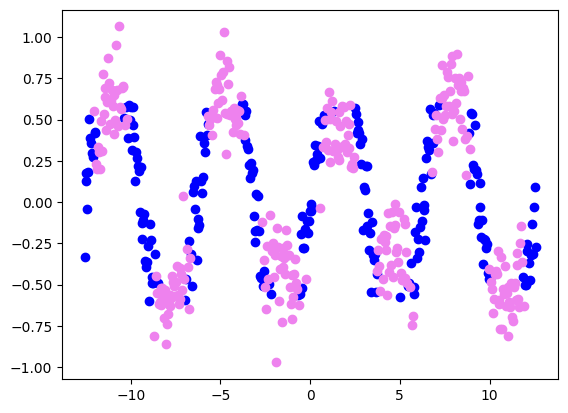

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.47it/s, loss = 1.9603; device = cpu]


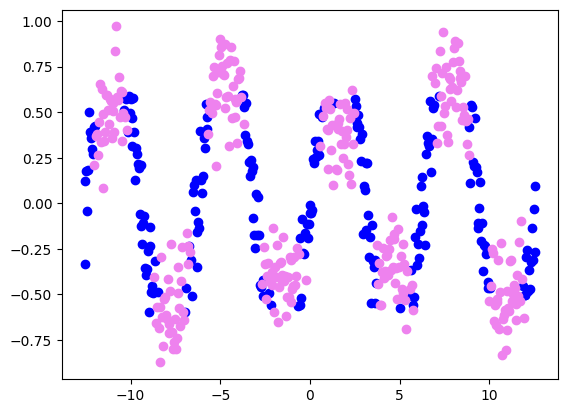

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 85.44it/s, loss = 1.9363; device = cpu]


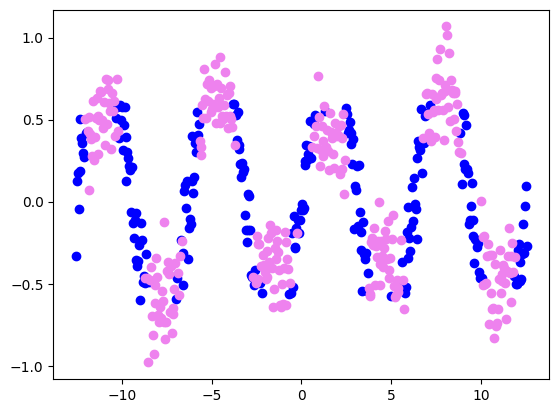

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 88.63it/s, loss = 1.9982; device = cpu]


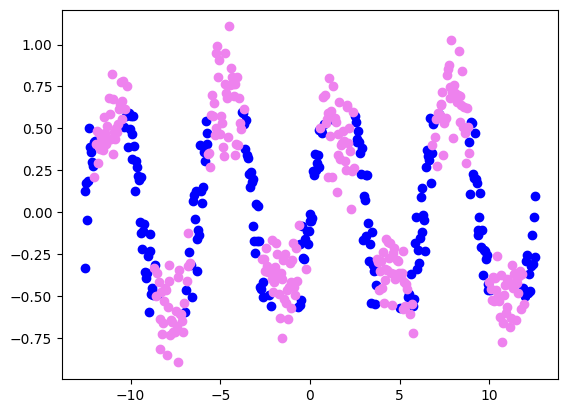

In [30]:
epochs = 500
gibbs_steps = 50
list_nn = []

model = regressor(D_theta, D_x,[128,128,128])
model.train(500,None, lr = 5e-3, verbose = True)
D_x_pseudo = model.f(D_theta_out).detach() + torch.randn([D_theta_out.shape[0],1])*0.15
D_x_plus = torch.cat([D_x, D_x_pseudo])
D_theta_plus = torch.cat([D_theta, D_theta_out])
plt.scatter(D_theta.numpy(), D_x.numpy(), color = 'blue')
plt.scatter(D_theta_out.numpy(), D_x_pseudo.detach().numpy(), color ='violet')
plt.show()
for _ in range(mc_samples):
    model = regressor(D_theta, D_x,[128,128,128])
    model.train(500,None, lr = 5e-3, verbose = True)
    list_nn.append(model)
    D_x_pseudo = f.function(D_theta_out).detach() + torch.randn([D_theta_out.shape[0],1])*0.15
    D_x_plus = torch.cat([D_x, D_x_pseudo])
    D_theta_plus = torch.cat([D_theta, D_theta_out])
    plt.scatter(D_theta.numpy(), D_x.numpy(), color = 'blue')
    plt.scatter(D_theta_out.numpy(), D_x_pseudo.detach().numpy(), color ='violet')
    plt.show()
test = torch.linspace(-4*math.pi, 4*math.pi,500).unsqueeze(-1)
predictions = [model.f(test) for model in list_nn]
pred = torch.cat(predictions, dim = -1)
mean, cov = torch.mean(pred, dim=-1), torch.sqrt(torch.var(pred, dim =-1))

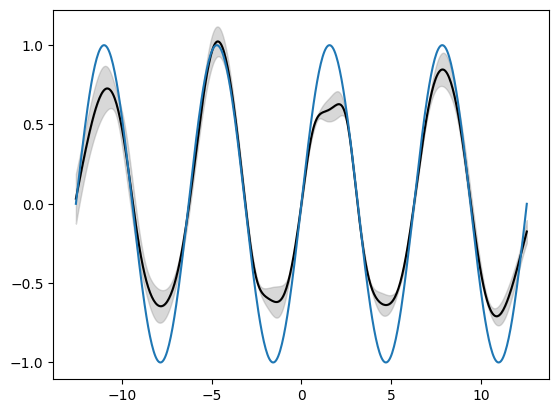

In [31]:
plt.plot(test.squeeze(-1).numpy(),mean.detach().numpy(), color = 'black')
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() + 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() - 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.plot(test, torch.sin(test))

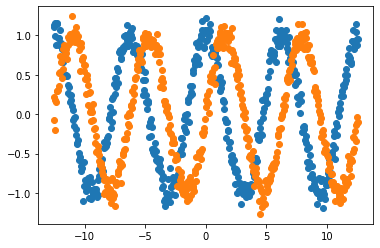

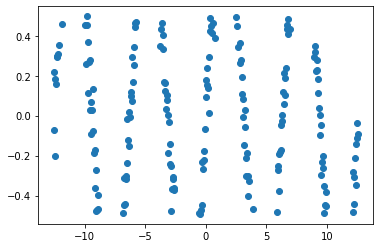

In [30]:
num_samples = 500
D_theta = torch.linspace(-4*math.pi, 4*math.pi,num_samples).unsqueeze(-1)
D_x = torch.cos(D_theta) + torch.randn([num_samples,1])*0.1
D_y = torch.sin(D_theta) + torch.randn([num_samples,1])*0.1

plt.scatter(D_theta,D_x)
plt.scatter(D_theta,D_y)
plt.show()
D_theta_out = D_theta[torch.abs(D_y)>0.5].unsqueeze(-1)
D_x_out = D_x[torch.abs(D_y)>0.5].unsqueeze(-1)
D_theta = D_theta[torch.abs(D_y)<0.5].unsqueeze(-1)
D_x =  D_x[torch.abs(D_y)<0.5].unsqueeze(-1)
D_y = D_y[torch.abs(D_y)<0.5].unsqueeze(-1)

plt.scatter(D_theta, D_y)
plt.show()

D_input_out = torch.cat([D_theta_out, D_x_out], dim = -1)
D_input = torch.cat([D_theta, D_x], dim = -1)
D_output = D_y

In [31]:
class nn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        hidden_dims = [128,128,128]
        network_dimensions = [2] + hidden_dims + [1]
        network = []
        for h0, h1 in zip(network_dimensions, network_dimensions[1:]):
            network.extend([torch.nn.Linear(h0, h1), torch.nn.SiLU(), ])
        network.pop()
        self.function = torch.nn.Sequential(*network)

In [40]:
epochs = 500
mc_samples = 50
list_nn = []
for _ in range(mc_samples):
    f = nn2()
    optim = torch.optim.Adam(f.parameters(), lr = 1e-2)
    pbar = tqdm(range(epochs))
    w = torch.distributions.Dirichlet(torch.ones(D_input.shape[0])).sample()
    for _ in pbar:
        optim.zero_grad()
        mse = torch.sum(w*torch.norm(D_output - f.function(D_input)))
        mse.backward()
        optim.step()
        pbar.set_postfix_str('mse = ' + str(mse.item()))
    list_nn.append(f)
test = torch.linspace(-4*math.pi, 4*math.pi,500).unsqueeze(-1)
input_test = torch.cat([test,torch.cos(test) + torch.randn([test.shape[0],1])*0.15 ], dim = -1)
predictions = [f.function(input_test) for f in list_nn]
pred = torch.cat(predictions, dim = -1)
mean, cov = torch.mean(pred, dim=-1), torch.sqrt(torch.var(pred, dim =-1))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 116.77it/s, mse = 1.1708996295928955]


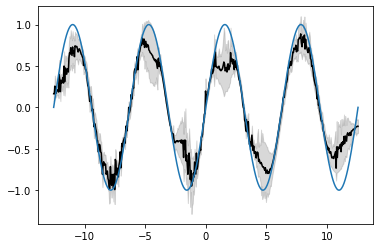

In [41]:
plt.plot(test.squeeze(-1).numpy(),mean.detach().numpy(), color = 'black')
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() + 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() - 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.plot(test, torch.sin(test))

In [36]:
epochs = 500
mc_samples = 10
gibbs_steps = 50
list_nn = []
for _ in range(mc_samples):
    f = nn2()
    optim = torch.optim.Adam(f.parameters(), lr = 1e-2)
    pbar = tqdm(range(epochs))
    w = torch.distributions.Dirichlet(torch.ones(D_input.shape[0])).sample()
    for _ in pbar:
        optim.zero_grad()
        mse = torch.sum(w*torch.norm(D_output - f.function(D_input)))
        mse.backward()
        optim.step()
        pbar.set_postfix_str('mse = ' + str(mse.item()))
    D_output_pseudo = f.function(D_input_out).detach() + torch.randn([D_input_out.shape[0],1])*0.1
    D_output_plus = torch.cat([D_output, D_output_pseudo])
    D_input_plus = torch.cat([D_input, D_input_out])
    for _ in range(mc_samples):
        f = nn2()
        optim = torch.optim.Adam(f.parameters(), lr = 5e-3)
        pbar = tqdm(range(epochs))
        w = torch.distributions.Dirichlet(torch.ones(D_input_plus.shape[0])).sample()
        for _ in pbar:
            optim.zero_grad()
            mse = torch.sum(w*torch.norm(D_output_plus - f.function(D_input_plus)))
            mse.backward()
            optim.step()
            pbar.set_postfix_str('mse = ' + str(mse.item()))

        D_output_pseudo = f.function(D_input_out).detach() + torch.randn([D_input_out.shape[0],1])*0.1
        D_output_plus = torch.cat([D_output, D_output_pseudo])
        D_input_plus = torch.cat([D_input, D_input_out])
    list_nn.append(f)
test = torch.linspace(-4*math.pi, 4*math.pi,500).unsqueeze(-1)
input_test = torch.cat([test,torch.cos(test) + torch.randn([test.shape[0],1])*0.15 ], dim = -1)
predictions = [f.function(input_test) for f in list_nn]
pred = torch.cat(predictions, dim = -1)
mean, cov = torch.mean(pred, dim=-1), torch.sqrt(torch.var(pred, dim =-1))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 99.55it/s, mse = 2.133284568786621]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 101.66it/s, mse = 2.1493446826934814]


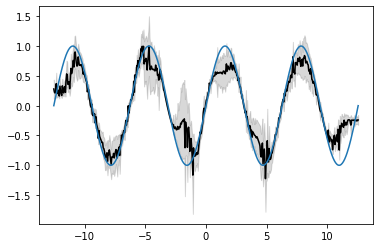

In [38]:
plt.plot(test.squeeze(-1).numpy(),mean.detach().numpy(), color = 'black')
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() + 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.fill_between(test.squeeze(-1).numpy(), mean.detach().numpy(), mean.detach().numpy() - 2*cov.detach().numpy(), color = 'grey', alpha = .3)
plt.plot(test, torch.sin(test))